$$
Model \ Documentation
$$

$$
\text{ Logistic Regression : Predict the hitrate of future trades to be excecuted with MS based on similar trade paraemters and price}
$$

$$
\textbf{Model Assumptions & Data Wrangling: }
$$

$$
\text{ Model Parameters: {BRL NDF_price, days_to_Maturity, Executed_Price, Notional, Spread_to_executed_price}}
$$

In [130]:
import pandas as pd 
from datetime import datetime
from numpy import random
from datetime import timedelta
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


#main import
#from imports import imports_main

In [125]:
def build_ts_trades():
    s_date = dt.date(2021,1,1)
    e_date = dt.date(2022,1,1)
    pd.date_range(s_date, e_date, freq = 'd')
    df_database = pd.DataFrame(index = pd.date_range(s_date, e_date, freq = 'd'), columns = ['ClientId', 'MsSide', 'Expiry', 'Notional'])
    df_database['Notional'] = random.choice([100000, 200000, 500000, 10000000], size=len(df_database))
    df_database['RFQ_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    df_database['MsSide'] = random.choice(['Buy', 'Sell'], size=len(df_database))
    df_database['MS_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    df_database['ClientId'] = random.choice(['GS', 'JP', 'AQR', 'Citi', 'BAML'], size=len(df_database))
    df_database['Expiry'] = pd.date_range(s_date, e_date, periods = len(df_database)) + timedelta(days = 10)
    df_database['SDR_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    
    
    df_database = df_database.reset_index()
    df_database = df_database.rename(columns ={'index': 'date'})
    df_database['days_to_maturity'] = random.choice([5, 20, 30, 40, 10, 25], size=len(df_database))
    df_database['Spread_to_executed_price'] = df_database['SDR_Price'] - df_database['MS_Price']
    df_database['Executed'] = 0
    df_database['Executed'] = np.where(df_database['Spread_to_executed_price'] == 0, 1, df_database['Executed'])
    
    
    
    #df_databse.loc['2022-09-01': '2022-09-05','Title'], df_databse.loc['2022-09-06': '2022-09-14','Title'], df_databse.loc['2022-09-01': '2022-09-14','Rating Action'] =  'NEW VERSION: Methodologies main Ref' , 'Methodologies main Ref','Methodologies'
    
    
    return df_database

endf_trades = build_ts_trades()
ts_trades = endf_trades
#ts_trades = endf_trades.loc[endf_trades['MS_Price'] > endf_trades['SDR_Price']]
ts_trades


,date,ClientId,MsSide,Expiry,Notional,RFQ_Price,MS_Price,SDR_Price,days_to_maturity,Spread_to_executed_price,Executed
0,2021-01-01,Citi,Sell,2021-01-11,10000000,5.5421,5.5902,5.2232,5,-0.3670,0
1,2021-01-02,Citi,Buy,2021-01-12,100000,5.5231,5.5421,5.2232,30,-0.3189,0
2,2021-01-03,BAML,Buy,2021-01-13,100000,5.2232,5.5231,5.5231,20,0.0000,1
3,2021-01-04,BAML,Sell,2021-01-14,10000000,5.5902,5.2232,5.5231,40,0.2999,0
4,2021-01-05,Citi,Buy,2021-01-15,500000,5.5421,5.5231,5.5231,5,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
361,2021-12-28,Citi,Sell,2022-01-07,100000,5.2232,5.5231,5.2232,25,-0.2999,0
362,2021-12-29,GS,Buy,2022-01-08,10000000,5.5231,5.2232,5.2232,25,0.0000,1
363,2021-12-30,Citi,Buy,2022-01-09,200000,5.5231,5.5231,5.2232,30,-0.2999,0
364,2021-12-31,JP,Sell,2022-01-10,10000000,5.2232,5.5421,5.5231,40,-0.0190,0


The Score:  0.75
Feature: 0, Score: 0.09513
Feature: 1, Score: -0.12917
Feature: 2, Score: 0.00042


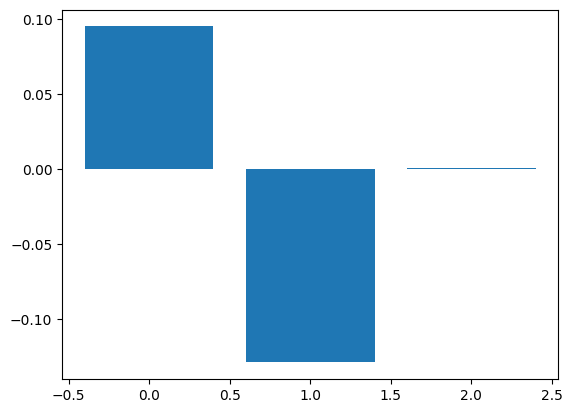

In [150]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


Y = ts_trades['Executed']
X = ts_trades[['Spread_to_executed_price', 'SDR_Price', 'days_to_maturity']]
validation_size = 0.25
#seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=0)

# define the model
model = LogisticRegression(solver='liblinear')
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]




#score
score = model.score(X_validation, Y_validation)
print('The Score: ', score)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importanceb
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [151]:
#prediction
y_pred = model.predict(X_validation)

cnf_matrix = metrics.confusion_matrix(Y_validation, y_pred)
cnf_matrix

array([[69,  0],
       [23,  0]])

Text(0.5, 427.9555555555555, 'Predicted label')

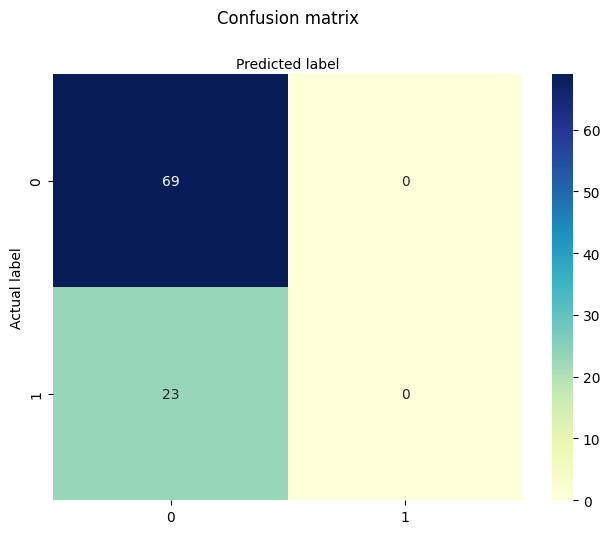

In [152]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')



In [153]:
print("Accuracy:",metrics.accuracy_score(Y_validation, y_pred)) 

print("Precision:",metrics.precision_score(Y_validation, y_pred)) 

print("Recall:",metrics.recall_score(Y_validation, y_pred))

Accuracy: 0.75
Precision: 0.0
Recall: 0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/var/folders/1w/cbp5zn894g56r4066l_mngv40000gn/T/ipykernel_60879/4078894476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: title={'center': 'Correlation Matrix'}>

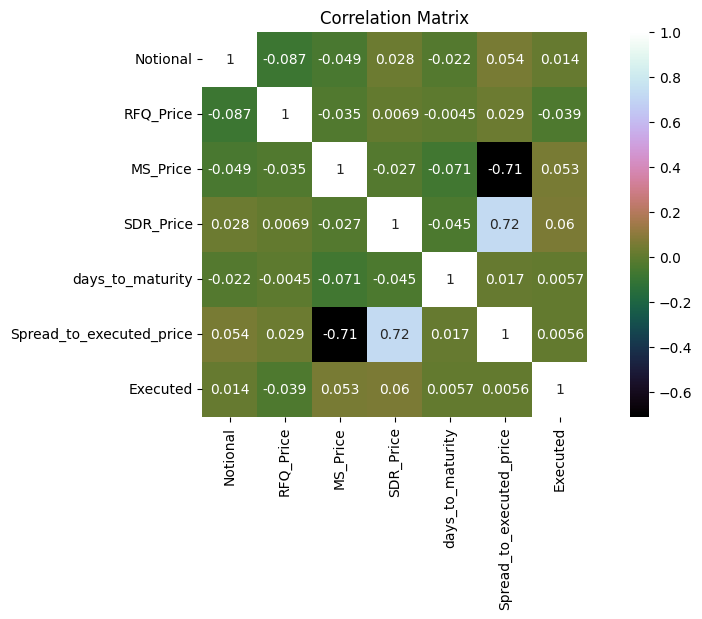

In [154]:
def correlation_among_features(df):
    correlation = df.corr() 
    plt.figure(figsize=(11,5))
    plt.title('Correlation Matrix')
    return sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

correlation_among_features(ts_trades)

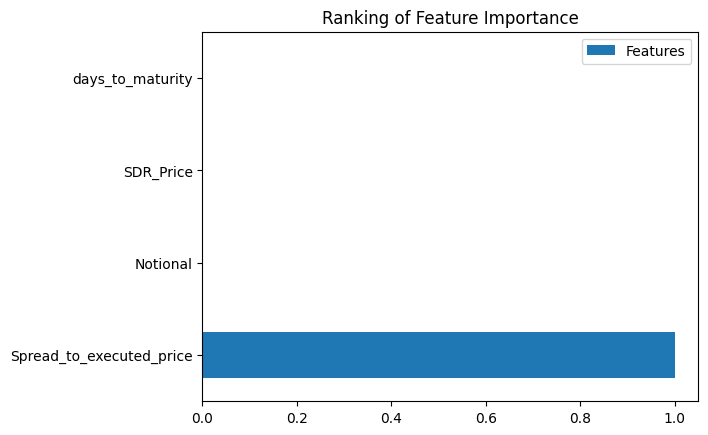

In [155]:
def feature_importance(df):
    
    Y = ts_trades['Executed']
    X = ts_trades[['Notional','SDR_Price', 'days_to_maturity', 'Spread_to_executed_price']]
    validation_size = 0.2
    seed = 3
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
    

    model = RandomForestRegressor(n_estimators=20, n_jobs=1)
    model.fit(X_train, Y_train)
    
    
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(30).plot(kind='barh', label='Features')
    plt.title('Ranking of Feature Importance')
    plt.legend()
    plt.show()
    
    
    #predictions
    #predictions = model.predict(X_validation)
    #results = mean_squared_error(Y_validation, predictions)
    
    #return results


feature_importance(ts_trades)


### AIC - Model 

- Used primarily for finding the optimal value for regularization of parameter alpha 

In [195]:
import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X,Y)
fit_time = time.time() - start_time

In [159]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [161]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, Y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

In [162]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
0.026655,446.990686,446.990686
0.009733,447.860547,451.763180
0.004471,448.872500,456.677767
0.000000,450.552657,462.260557


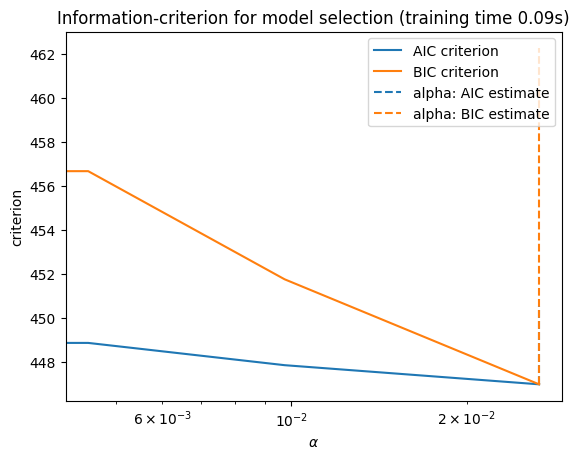

In [163]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)


### ROC Curve 

In [165]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_validation)
y_onehot_test.shape  # (n_samples, n_classes)

(92, 1)

#### type(Y_train)

In [181]:
label_binarizer.transform(['Executed'])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([[0]])

In [255]:
class_of_interest = "Executed"
#class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
#class_id

In [254]:
"""import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
#plt.show()"""

'import matplotlib.pyplot as plt\nfrom sklearn.metrics import RocCurveDisplay\n\nRocCurveDisplay.from_predictions(\n    y_onehot_test[:, class_id],\n    y_score[:, class_id],\n    name=f"{class_of_interest} vs the rest",\n    color="darkorange",\n)\nplt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")\nplt.axis("square")\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")\nplt.legend()\n#plt.show()'

#### Time Series Linear Regression 

###  Normalization

In [185]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler().fit(X_validation)
X_norm = min_max_scaler.transform(X)


scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X)

In [186]:
X_train

,Spread_to_executed_price,SDR_Price,days_to_maturity
208,0.2999,5.5231,30
229,0.0000,5.2232,10
200,0.0671,5.5902,30
136,0.2999,5.5231,10
116,0.0000,5.5421,40
...,...,...,...
323,0.0190,5.5421,20
192,0.0190,5.5421,10
117,-0.0481,5.5421,25
47,0.0190,5.5421,30


In [187]:
Y_train

208    0
229    1
200    0
136    0
116    1
      ..
323    0
192    0
117    0
47     0
172    1
Name: Executed, Length: 274, dtype: int64

In [ ]:
def build_ts_trades():
    s_date = dt.date(2021,1,1)
    e_date = dt.date(2022,1,1)
    pd.date_range(s_date, e_date, freq = 'd')
    df_database = pd.DataFrame(index = pd.date_range(s_date, e_date, freq = 'd'), columns = ['ClientId', 'MsSide', 'Expiry', 'Notional'])
    df_database[''] = random.choice([100000, 200000, 500000, 10000000], size=len(df_database))
    df_database['RFQ_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    df_database['MsSide'] = random.choice(['Buy', 'Sell'], size=len(df_database))
    df_database['MS_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    df_database['ClientId'] = random.choice(['GS', 'JP', 'AQR', 'Citi', 'BAML'], size=len(df_database))
    df_database['Expiry'] = pd.date_range(s_date, e_date, periods = len(df_database)) + timedelta(days = 10)
    df_database['SDR_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    
    
    df_database = df_database.reset_index()
    df_database = df_database.rename(columns ={'index': 'date'})
    df_database['days_to_maturity'] = random.choice([5, 20, 30, 40, 10, 25], size=len(df_database))
    df_database['Spread_to_executed_price'] = df_database['SDR_Price'] - df_database['MS_Price']
    df_database['Executed'] = 0
    df_database['Executed'] = np.where(df_database['Spread_to_executed_price'] == 0, 1, df_database['Executed'])
    
    
    
    #df_databse.loc['2022-09-01': '2022-09-05','Title'], df_databse.loc['2022-09-06': '2022-09-14','Title'], df_databse.loc['2022-09-01': '2022-09-14','Rating Action'] =  'NEW VERSION: Methodologies main Ref' , 'Methodologies main Ref','Methodologies'
    
    
    return df_database

endf_trades = build_ts_trades()
ts_trades = endf_trades
#ts_trades = endf_trades.loc[endf_trades['MS_Price'] > endf_trades['SDR_Price']]
ts_trades


In [239]:
X_train[:3].mean(axis=0)

X_2 = preprocessing.scale(X_train[:]).mean(axis=0)
X_2

array([-3.88983250e-17,  6.17186756e-15, -1.62076354e-17])

<AxesSubplot: >

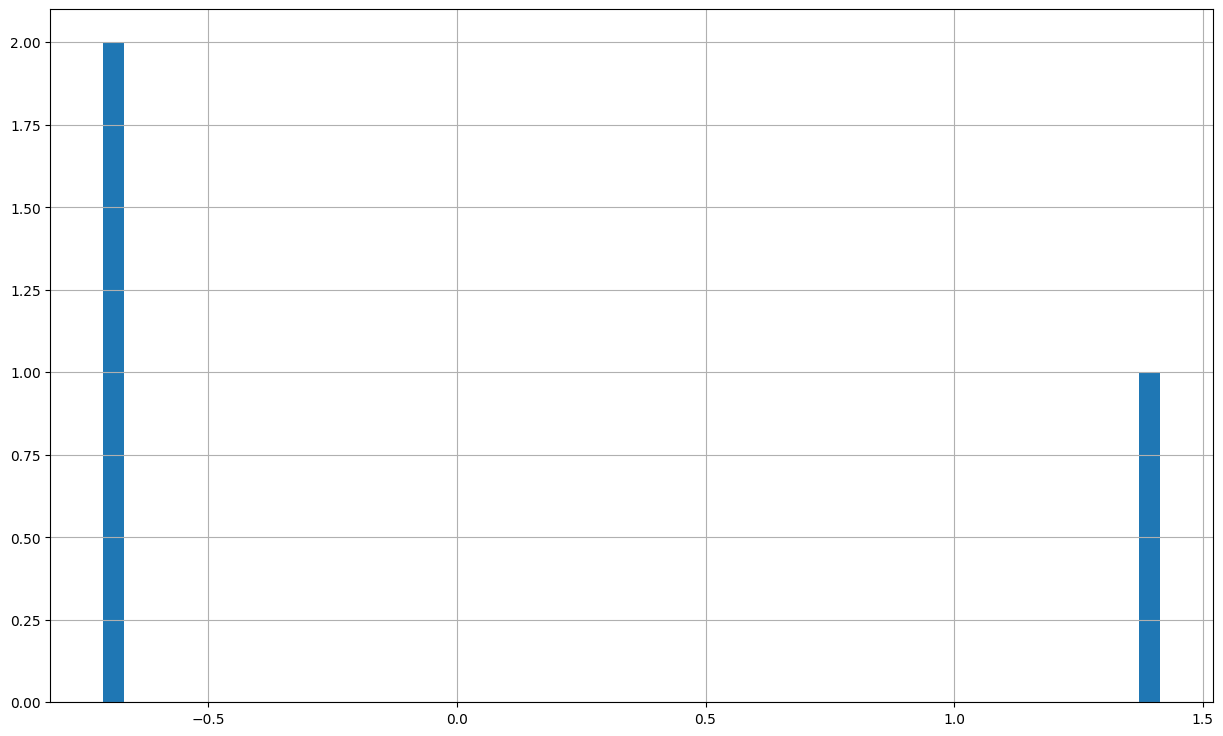

In [240]:
#pd.Series(X_2)
pd.Series(preprocessing.scale(X_2)).hist(bins=50, figsize=(15,9))

In [235]:
X

Spread_to_executed_price  SDR_Price  days_to_maturity
 0.0000                   5.5231     25                  10
                                     5                    9
                                     30                   8
                                     10                   7
-0.0671                   5.5231     20                   6
                                                         ..
                                     10                   1
-0.0481                   5.5421     10                   1
 0.0000                   5.5902     25                   1
-0.3189                   5.2232     40                   1
 0.0000                   5.5421     30                   1
Length: 92, dtype: int64

array([[<AxesSubplot: title={'center': 'Spread_to_executed_price'}>,
        <AxesSubplot: title={'center': 'SDR_Price'}>],
       [<AxesSubplot: title={'center': 'days_to_maturity'}>,
        <AxesSubplot: >]], dtype=object)

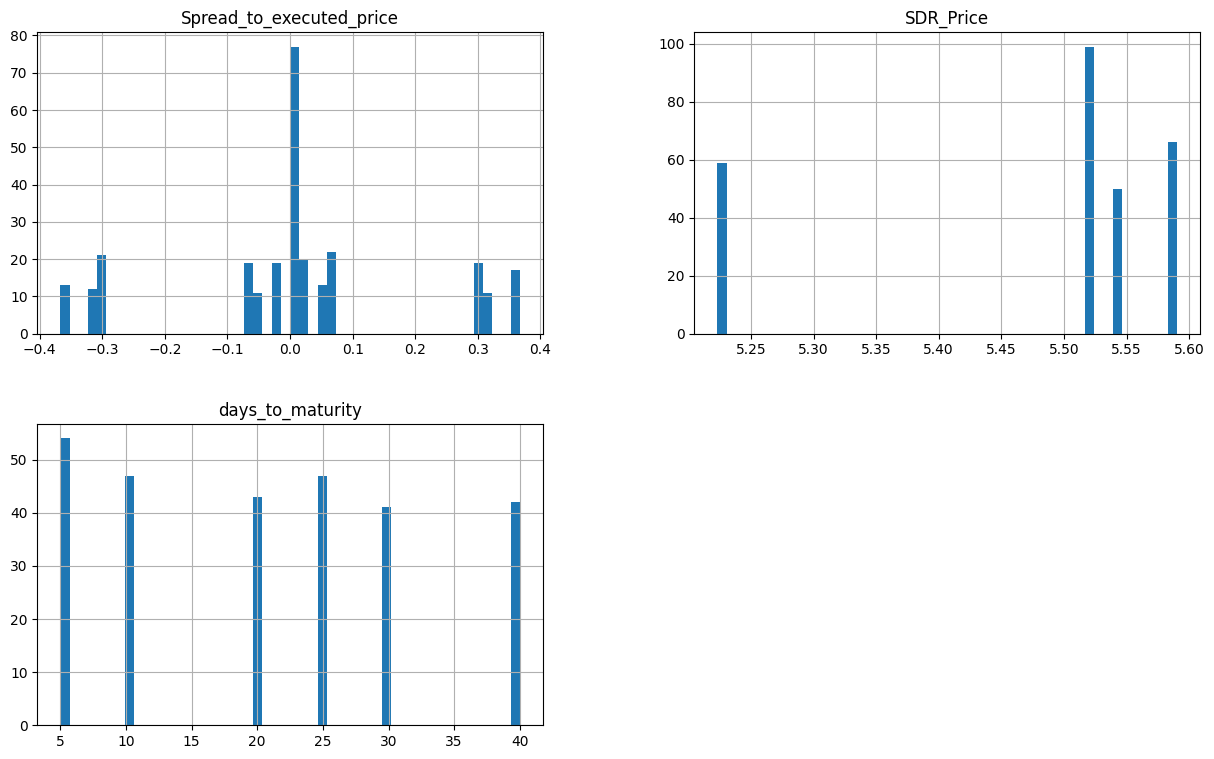

In [237]:
X_train.hist(figsize = (15,9), bins = 50)

array([[<AxesSubplot: title={'center': 'date'}>,
        <AxesSubplot: title={'center': 'Expiry'}>,
        <AxesSubplot: title={'center': 'Notional'}>],
       [<AxesSubplot: title={'center': 'RFQ_Price'}>,
        <AxesSubplot: title={'center': 'MS_Price'}>,
        <AxesSubplot: title={'center': 'SDR_Price'}>],
       [<AxesSubplot: title={'center': 'days_to_maturity'}>,
        <AxesSubplot: title={'center': 'Spread_to_executed_price'}>,
        <AxesSubplot: title={'center': 'Executed'}>]], dtype=object)

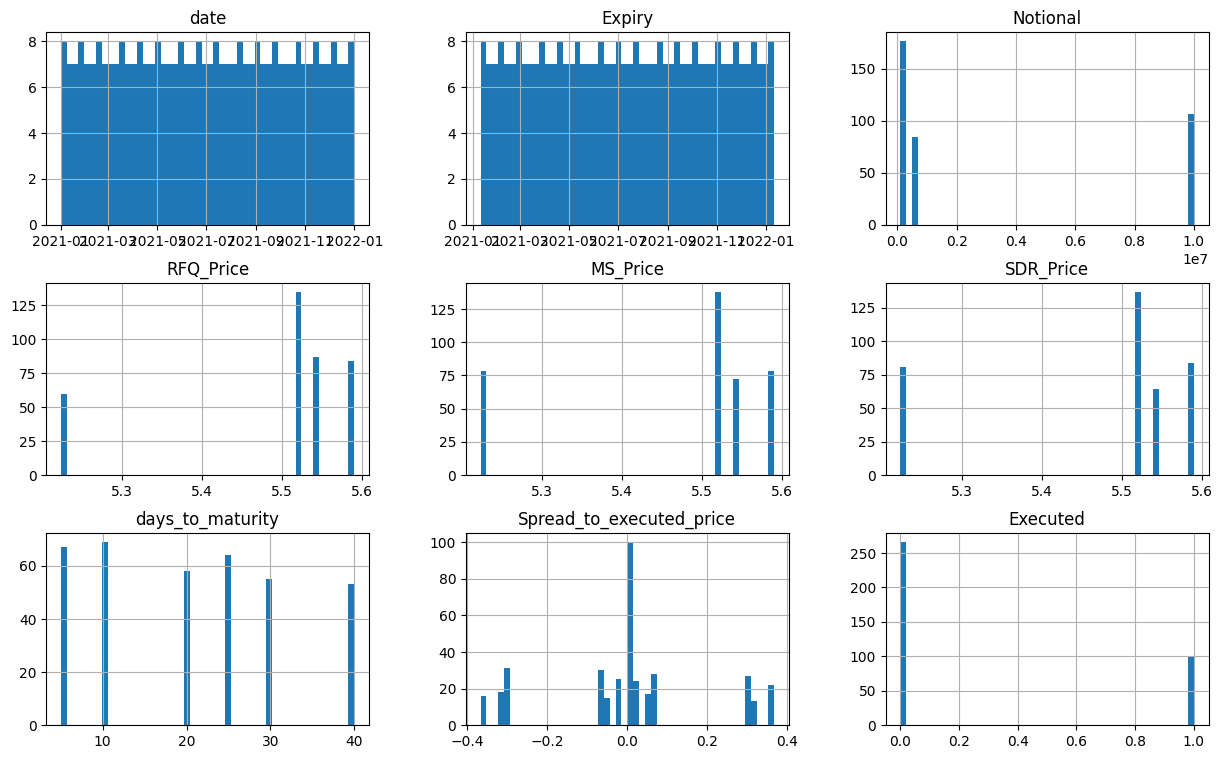

In [238]:
ts_trades.hist(figsize = (15,9), bins = 50)

In [232]:
#pd.Series(X_train[:, 3]).hist(bins=50)
X_train[:3].mean(axis=0)

Spread_to_executed_price     0.122333
SDR_Price                    5.445500
days_to_maturity            23.333333
dtype: float64

In [207]:
X_train[::1]

,Spread_to_executed_price,SDR_Price,days_to_maturity
208,0.2999,5.5231,30
229,0.0000,5.2232,10
200,0.0671,5.5902,30
136,0.2999,5.5231,10
116,0.0000,5.5421,40
...,...,...,...
323,0.0190,5.5421,20
192,0.0190,5.5421,10
117,-0.0481,5.5421,25
47,0.0190,5.5421,30


In [251]:
#[np.zeros(x.shape) for i in range(10)]
#np.zeros(ts_trades.shape)[0][1:,:]

In [252]:
def transform(x):
    diffs = 25
    diff = [np.zeros(x.shape) for i in range(diffs)]
    n = len(x)
    diff[0][1:,:] = x[:n-1,:]
    for i in range(1, diffs):
        diff[i][1:,:] = diff[i-1][:n-1,:]
    return np.hstack([x, *diff])

#transform()

In [242]:
df_

,date,ClientId,MsSide,Expiry,Notional,RFQ_Price,MS_Price,SDR_Price,days_to_maturity,Spread_to_executed_price,Executed
0,2021-01-01,Citi,Sell,2021-01-11,10000000,5.5421,5.5902,5.2232,5,-0.3670,0
1,2021-01-02,Citi,Buy,2021-01-12,100000,5.5231,5.5421,5.2232,30,-0.3189,0
2,2021-01-03,BAML,Buy,2021-01-13,100000,5.2232,5.5231,5.5231,20,0.0000,1
3,2021-01-04,BAML,Sell,2021-01-14,10000000,5.5902,5.2232,5.5231,40,0.2999,0
4,2021-01-05,Citi,Buy,2021-01-15,500000,5.5421,5.5231,5.5231,5,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
361,2021-12-28,Citi,Sell,2022-01-07,100000,5.2232,5.5231,5.2232,25,-0.2999,0
362,2021-12-29,GS,Buy,2022-01-08,10000000,5.5231,5.2232,5.2232,25,0.0000,1
363,2021-12-30,Citi,Buy,2022-01-09,200000,5.5231,5.5231,5.2232,30,-0.2999,0
364,2021-12-31,JP,Sell,2022-01-10,10000000,5.2232,5.5421,5.5231,40,-0.0190,0
